# 3.6.3 Amazon Reviews

This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.
This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs). The file is present in URL-http://jmcauley.ucsd.edu/data/amazon/

Columns are as below:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

helpful - helpfulness rating of the review, e.g. 2/3

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

In [ ]:

import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import time
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import gzip
import numpy as np
import json
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
start=datetime.now()
rfc = ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression


def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('C:/Users/ankush/Downloads/reviews_Pet_Supplies_5.json.gz')


# Exploring The Data

We only care about only one column here-reviewText in the dataset.Then we will get the keywords out of the column reviewtext and will evaluate if they are negative or positive

In [2]:
df['overall'].describe()

count   157836.000
mean         4.230
std          1.176
min          1.000
25%          4.000
50%          5.000
75%          5.000
max          5.000
Name: overall, dtype: float64

In [ ]:
positive_keywords = ['great','enjoyed','loves','like','recommend','happy','yummy','nice','very','good','easy','useful','awesome','works','love','excellent','helpful','Best','nicely','wonderful']
negative_keywords = ['not','disgusting','junk','bad','didn\'t work','waste','crap']


We have assigned the keywords as positive keywords and negative keywords based on the customer reviews and keywords used to give the rating if its good or bad

In [3]:
df['positive_sentiments']=np.where(df.reviewText.str.contains(' ' + str(positive_keywords) + ' ',case=False), 1, 0)

In [4]:

for key in positive_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

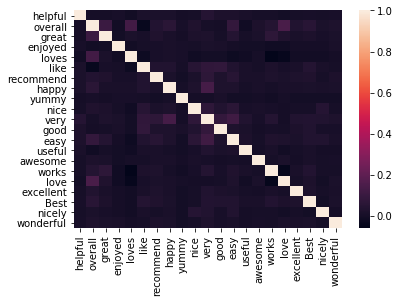

In [7]:
sns.heatmap(df.drop(['unixReviewTime','positive_sentiments'],axis=1).corr())

In [5]:

Y=df['positive_sentiments']
X = df[positive_keywords]
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
# Instantiate our model and store it in a new variable.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


Using Dimension Reduction PCA to reduce the features and then use each model on these techniques as below

In [6]:
X_pca = PCA(n_components=10)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)

By using PCA, we can see 10 features are closely correlated to the output variable so we will keep them.Now we will use these techniques for each Classification model
#Gridsearchcv
#Cross Validation
#classification_report
#AUC
#Confusion Matrix

In [9]:
#Naive Bayes doesn't need parameter tuning so we just need to get only accuracy score
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB() 
bnb = bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_train)
print("Accuracy:", bnb.score(X_train, y_train))

Accuracy: 0.872905249152596


In [ ]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_train_pca)
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class.fit(X_train_pca,y_train)
#The best hyper parameters set

results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

In [41]:
#Random Forest
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_pca, y_train)
y_pred_rfc = rfc.predict(X_train_pca)
#Gridsearchcv to get the best parameters
dt_grid={'max_depth':[3,4,5],'max_features': [10]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_pca, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)
print(y_pred_rfc)

[{'max_depth': 3, 'max_features': 10}, {'max_depth': 4, 'max_features': 10}, {'max_depth': 5, 'max_features': 10}]
[0.87290525 0.87288941 0.87288941]
[0.87290525 0.87290683 0.87290683]
Best Hyper Parameters:
 {'max_depth': 3, 'max_features': 10}
0.872905249152596
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[1 1 1 ... 1 1 1]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [43]:
#Decision Tree
decision_tree = tree.DecisionTreeClassifier(max_depth=50)
decision_tree.fit(X_train_pca, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)
dt_grid={'max_depth':[50],'max_features': [10]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_pca, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)


[{'max_depth': 50, 'max_features': 10}]
[0.87220832]
[0.87319986]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 10}
0.8722083188139513
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
#SVC
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_train_pca)
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(SVC(),param_grid,refit = True)
grid_class_svm.fit(X_train_pca, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [14]:
#Linear Regression
lr = LogisticRegression(C=1e9)
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_train_pca)
#Gridsearchcv 
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=model_selection.GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_pca,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525]
[0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525]
Best Hyper Parameters:
 {'C': 0.001, 'penalty': 'l1'}
0.872905249152596
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_sta

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
#GBR
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)


GridSearchcv  looks to be good for all the models except Decision Tree 

# Cross Validation

In [44]:
# Naive Bayes model 
print("Training data accuracy for Naive Bayes: ",cross_val_score(bnb, X_train_pca, y_train, cv=10))
print("Testing data accuracy Naive Bayes: ",cross_val_score(bnb, X_test_pca, y_test, cv=10))
#KNN

#print("Training data accuracy for KNN: ",cross_val_score(knn_model, X_train_pca, y_train, cv=10))
#print("Testing data accuracy for KNN: ",cross_val_score(knn_model, X_test_pca, y_test, cv=10))
#Random Forest
print("Training data accuracy for RandomForest: ",cross_val_score(rfc, X_train_pca, y_train, cv=10))
print("Testing data accuracy for RandomForest: ",cross_val_score(rfc, X_test_pca, y_test, cv=10))
#Decision Tree
print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_pca, y_test, cv=10))
#SVC
#print("Training data accuracy for SVC: ",cross_val_score(SVC(), X_train_pca, y_train, cv=6))
#print("Testing data accuracy for SVC: ",cross_val_score(SVC(), X_test_pca, y_test, cv=6))
#Linear Regression
print("Training data accuracy for Linear Regression : ",cross_val_score(lr, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Linear Regression  : ",cross_val_score(lr, X_test_pca, y_test, cv=10))
#GBR
#print("Training data accuracy for GBR: ",cross_val_score(clf, X_train_pca, y_train, cv=10))
#print("Testing data accuracy for GBR: ",cross_val_score(clf, X_test_pca, y_test, cv=10))

print("Training data accuracy for BNB: ",cross_val_score(bnb, X_train, y_train, cv=10))
print("Testing data accuracy for BNB: ",cross_val_score(bnb, X_test, y_test, cv=10))

Training data accuracy for Naive Bayes:  [0.87289142 0.87289142 0.87289142 0.87289142 0.87289142 0.87289142
 0.87289142 0.87289142 0.87296056 0.87296056]
Testing data accuracy Naive Bayes:  [0.87048765 0.87048765 0.87048765 0.87076338 0.87076338 0.87072243
 0.87072243 0.87072243 0.87072243 0.87072243]
Training data accuracy for RandomForest:  [0.87289142 0.87289142 0.87289142 0.87289142 0.87289142 0.87289142
 0.87289142 0.87281223 0.87288136 0.87280215]
Testing data accuracy for RandomForest:  [0.86953768 0.86985434 0.87048765 0.87044663 0.87012987 0.87040558
 0.87072243 0.87072243 0.86945501 0.86945501]
Training data accuracy for Decision Tree:  [0.87217866 0.87217866 0.87209947 0.87202027 0.87202027 0.87217866
 0.87194108 0.87265384 0.87224774 0.87224774]
Testing data accuracy for Decision Tree:  [0.8679544  0.86700443 0.86827106 0.86949636 0.86822933 0.86787072
 0.86945501 0.86882129 0.86818758 0.86850444]
Training data accuracy for Linear Regression :  [0.87289142 0.87289142 0.8728


It actually looks like we did good on cross val with PCA than we did with our full feature set. There is no overfitting since we have derived our own features with the keywords

# Area Under Curve

In [45]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for BNB :" ,roc_auc_score(y_train, y_pred_bnb))
#print ("AUC Score for KNN:" ,roc_auc_score(y_train, y_pred_knn))
print ("AUC Score for Random Forest:" ,roc_auc_score(y_train,y_pred_rfc))
print ("AUC Score for Decision Tree:" ,roc_auc_score(y_train, y_pred_dt))
#print ("AUC Score for SVM:" ,roc_auc_score(y_train, y_pred_svm))
print ("AUC Score for Linear Regression:" ,roc_auc_score(y_train, y_pred_lr))
#print ("AUC Score for GBR:" ,roc_auc_score(y_train, y_pred_gbr))


AUC Score for BNB : 0.5
AUC Score for Random Forest: 0.5001999501857338
AUC Score for Decision Tree: 0.501875473877768
AUC Score for Linear Regression: 0.5


AUC performed ok with PCA

# Confusion Matrix

In [46]:

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
#print(confusion_matrix(y_train, y_pred_bnb))
#print('Accuracy Score for KBN :',accuracy_score(y_train, y_pred_bnb))
#print(confusion_matrix(y_train, y_pred_knn))
#print('Accuracy Score for KNN :',accuracy_score(y_train, y_pred_knn))
print(confusion_matrix(y_train, y_pred_rfc))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_rfc))
print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))
#print(confusion_matrix(y_train, y_pred_SVM))
#print('Accuracy Score for SVM:',accuracy_score(y_train, y_pred_svm))
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for Linear Regression :',accuracy_score(y_train, y_pred_lr))
#print(confusion_matrix(y_train, y_pred_gbr))
#print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))
print(confusion_matrix(y_train, y_pred_bnb))
print('Accuracy Score for BNB :',accuracy_score(y_train, y_pred_bnb))

[[     7  16041]
 [     4 110216]]
Accuracy Score for Random Forest : 0.8729290081414135
[[    65  15983]
 [    33 110187]]
Accuracy Score for Decision Tree : 0.8731586783666487
[[     0  16048]
 [     0 110220]]
Accuracy Score for Linear Regression : 0.872905249152596
[[     0  16048]
 [     0 110220]]
Accuracy Score for BNB : 0.872905249152596


Accuracy looks to be doing well after PCA.There are 3 models KNN,SVC,GBR  that are taking lot of time to complete.Accuracy is similar but these 3 models are very slow compared to others

In [47]:
#Classification Report
from sklearn.metrics import classification_report
#print("Classification Report for KNN:",classification_report(y_train, y_pred_knn))
print("Classification Report for RFC:",classification_report(y_train, y_pred_rfc))
print("Classification Report for DT:",classification_report(y_train, y_pred_dt))
#print("Classification Report for SVM:",classification_report(y_train, y_pred_svm))
print("Classification Report for LR:",classification_report(y_train, y_pred_lr))
#print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))
print("Classification Report for BNB:",classification_report(y_train, y_pred_bnb))

Classification Report for RFC:              precision    recall  f1-score   support

          0       0.64      0.00      0.00     16048
          1       0.87      1.00      0.93    110220

avg / total       0.84      0.87      0.81    126268

Classification Report for DT:              precision    recall  f1-score   support

          0       0.66      0.00      0.01     16048
          1       0.87      1.00      0.93    110220

avg / total       0.85      0.87      0.81    126268

Classification Report for LR:              precision    recall  f1-score   support

          0       0.00      0.00      0.00     16048
          1       0.87      1.00      0.93    110220

avg / total       0.76      0.87      0.81    126268

Classification Report for BNB:              precision    recall  f1-score   support

          0       0.00      0.00      0.00     16048
          1       0.87      1.00      0.93    110220

avg / total       0.76      0.87      0.81    126268



C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 score and recall are very good and ran at a good time.Now,lets get the accuracy using same techniques after going feature reduction SelectKbest(SKB)

In [48]:
skb = SelectKBest(f_classif,k=10)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

In [ ]:
#Gridsearchcv for KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_skb, y_train)
y_pred_knn = knn_model.predict(X_train_skb)
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class.fit(X_train_skb,y_train)
#The best hyper parameters set

results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

In [49]:
#Gridsearchcv for Random Forest
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_skb, y_train)
y_pred_rfc = rfc.predict(X_train_skb)

#Gridsearchcv to get the best parameters
dt_grid={'max_depth':[3,4,5],'max_features': [10]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_skb, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 10}, {'max_depth': 4, 'max_features': 10}, {'max_depth': 5, 'max_features': 10}]
[0.87290525 0.87290525 0.87290525]
[0.87290525 0.87290525 0.87290525]
Best Hyper Parameters:
 {'max_depth': 3, 'max_features': 10}
0.872905249152596
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [31]:
#Gridsearchcv for Decision Tree
decision_tree = tree.DecisionTreeClassifier(max_depth=50)
decision_tree.fit(X_train_skb, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)
dt_grid={'max_depth':[50],'max_features': [10]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_skb, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 10}]
[0.03312844]
[0.03533932]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 10}
0.03312843505540145
DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
#Gridsearchcv for SVC
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_skb, y_train)
y_pred_svm = svm.predict(X_train_pca)
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(SVC(),param_grid,refit = True)
grid_class_svm.fit(X_train_skb, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [50]:
#Gridsearchcv for Linear Regression
lr = LogisticRegression(C=1e9)
lr.fit(X_train_skb, y_train)
y_pred_lr = lr.predict(X_train_pca)
#Gridsearchcv 
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=model_selection.GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_skb,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525]
[0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525 0.87290525
 0.87290525 0.87290525]
Best Hyper Parameters:
 {'C': 0.001, 'penalty': 'l1'}
0.872905249152596
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_sta

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
#Gridsearchcv for GBR
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_skb, y_train)
y_pred_gbr = clf.predict(X_train_skb)

params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_skb, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)


Gridsearchcv for all the models look good.There is no overfitting as well.This shows the best parameters and these parameters are actually good but these 3 models-KNN,SVC,GBR are very slow to run

# Cross Validation

In [33]:
# Naive Bayes model 
print("Training data accuracy for Naive Bayes: ",cross_val_score(bnb, X_train_skb, y_train, cv=10))
print("Testing data accuracy Naive Bayes: ",cross_val_score(bnb, X_test_skb, y_test, cv=10))
#KNN

#print("Training data accuracy for KNN: ",cross_val_score(knn_model, X_train_pca, y_train, cv=10))
#print("Testing data accuracy for KNN: ",cross_val_score(knn_model, X_test_pca, y_test, cv=10))
#Random Forest
print("Training data accuracy for RandomForest: ",cross_val_score(rfc, X_train_skb, y_train, cv=10))
print("Testing data accuracy for RandomForest: ",cross_val_score(rfc, X_test_skb, y_test, cv=10))
#Decision Tree
print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_skb, y_train, cv=10))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_skb, y_test, cv=10))
#SVC
#print("Training data accuracy for SVC: ",cross_val_score(SVC(), X_train_pca, y_train, cv=6))
#print("Testing data accuracy for SVC: ",cross_val_score(SVC(), X_test_pca, y_test, cv=6))
#Linear Regression
print("Training data accuracy for Linear Regression : ",cross_val_score(lr, X_train_skb, y_train, cv=10))
print("Testing data accuracy for Linear Regression  : ",cross_val_score(lr, X_test_skb, y_test, cv=10))
#GBR
#print("Training data accuracy for GBR: ",cross_val_score(clf, X_train_pca, y_train, cv=10))
#print("Testing data accuracy for GBR: ",cross_val_score(clf, X_test_pca, y_test, cv=10))

Training data accuracy for Naive Bayes:  [0.87289142 0.87289142 0.87289142 0.87289142 0.87289142 0.87289142
 0.87289142 0.87289142 0.87296056 0.87296056]
Testing data accuracy Naive Bayes:  [0.87048765 0.87048765 0.87048765 0.87076338 0.87076338 0.87072243
 0.87072243 0.87072243 0.87072243 0.87072243]
Training data accuracy for RandomForest:  [0.87289142 0.87289142 0.87281223 0.87289142 0.87289142 0.87289142
 0.87289142 0.87289142 0.87296056 0.87296056]
Testing data accuracy for RandomForest:  [0.87048765 0.87017099 0.87048765 0.87076338 0.87012987 0.87072243
 0.87072243 0.87072243 0.87072243 0.87040558]
Training data accuracy for Decision Tree:  [0.03572017 0.03064547 0.03014971 0.03688803 0.03402281 0.02605869
 0.03582924 0.03657702 0.03253483 0.03297041]
Testing data accuracy for Decision Tree:  [0.03039317 0.03193143 0.03203083 0.03992709 0.01995285 0.03159251
 0.01675072 0.03213772 0.03076928 0.02463451]
Training data accuracy for Linear Regression :  [0.87289142 0.87289142 0.8728

It actually looks like we did good  on cross val with SKB than we did with our full feature set. There is no overfitting since we have derived our own features with the keywords

# AUC

In [52]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for BNB :" ,roc_auc_score(y_train, y_pred_bnb))
#print ("AUC Score for KNN:" ,roc_auc_score(y_train, y_pred_knn))
print ("AUC Score for Random Forest:" ,roc_auc_score(y_train, y_pred_rfc))
print ("AUC Score for Decision Tree:" ,roc_auc_score(y_train, y_pred_dt))
#print ("AUC Score for SVM:" ,roc_auc_score(y_train, y_pred_svm))
print ("AUC Score for Linear Regression:" ,roc_auc_score(y_train, y_pred_lr))
#print ("AUC Score for GBR:" ,roc_auc_score(y_train, y_pred_gbr))

AUC Score for BNB : 0.5
AUC Score for Random Forest: 0.5000934695912262
AUC Score for Decision Tree: 0.501875473877768
AUC Score for Linear Regression: 0.5


AUC score is also good after doing SKB

# Confusion Matrix

In [53]:

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_bnb))
print('Accuracy Score for BNB :',accuracy_score(y_train, y_pred_bnb))
#print(confusion_matrix(y_train, y_pred_knn))
#print('Accuracy Score for KNN :',accuracy_score(y_train, y_pred_knn))
print(confusion_matrix(y_train, y_pred_rfc))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_rfc))
print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))
#print(confusion_matrix(y_train, y_pred_svm))
#print('Accuracy Score for SVM:',accuracy_score(y_train, y_pred_svm))
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for Linear Regression :',accuracy_score(y_train, y_pred_lr))
#print(confusion_matrix(y_train, y_pred_gbr))
#print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))

[[     0  16048]
 [     0 110220]]
Accuracy Score for BNB : 0.872905249152596
[[     3  16045]
 [     0 110220]]
Accuracy Score for Random Forest : 0.8729290081414135
[[    65  15983]
 [    33 110187]]
Accuracy Score for Decision Tree : 0.8731586783666487
[[     0  16048]
 [     0 110220]]
Accuracy Score for Linear Regression : 0.872905249152596


It did faily well but this is just for positive  keywords in customer reviews.

# Classification Report

In [54]:
#Classification Report
from sklearn.metrics import classification_report
#print("Classification Report for KNN:",classification_report(y_train, y_pred_knn))
print("Classification Report for RFC:",classification_report(y_train, y_pred_rfc))
print("Classification Report for DT:",classification_report(y_train, y_pred_dt))
#print("Classification Report for SVM:",classification_report(y_train, y_pred_svm))
print("Classification Report for LR:",classification_report(y_train, y_pred_lr))
#print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))
print("Classification Report for BNB:",classification_report(y_train, y_pred_bnb))

Classification Report for RFC:              precision    recall  f1-score   support

          0       1.00      0.00      0.00     16048
          1       0.87      1.00      0.93    110220

avg / total       0.89      0.87      0.81    126268

Classification Report for DT:              precision    recall  f1-score   support

          0       0.66      0.00      0.01     16048
          1       0.87      1.00      0.93    110220

avg / total       0.85      0.87      0.81    126268

Classification Report for LR:              precision    recall  f1-score   support

          0       0.00      0.00      0.00     16048
          1       0.87      1.00      0.93    110220

avg / total       0.76      0.87      0.81    126268

Classification Report for BNB:              precision    recall  f1-score   support

          0       0.00      0.00      0.00     16048
          1       0.87      1.00      0.93    110220

avg / total       0.76      0.87      0.81    126268



C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 score and recall score is very good.The score didnot change  when compared to PCA values.

# Conclusion:

All the models have had good accuracy score.There are 3 models -KNN,SVC,GBS which are very slow.It has been more than 7 hours , then these ,models are still running.There is  no difference in performance between PCA and SKB.This is a classification problem so we have used classification models and have tried to get the accuracy to predict the outome.The end goal is to predict the right outcome so for that the accuracy should be considerably high.If we observe this above cross validation accuracy,f1 score,precision is very promising.As observed above, it does not make any difference if we use PCA or SKB, accuracy score and f1 score remained similar.This is what we had expected.We usually expect GBS to slowest of all since it runs in multiple cycle to get more accuracy but a little surpised with SVC and KNN.This problem is about predicting positive reviews where we have been presented the text and reviews of some customers and we are checking how accurate are the models in predicting the outcome.